In [1]:
import pandas as pd
import numpy as np

In [2]:
c = pd.read_csv('./customer_join.csv')
ul = pd.read_csv('./use_log.csv')

In [3]:
ul.isnull().sum()

log_id         0
customer_id    0
usedate        0
dtype: int64

In [4]:
c.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
amax                0
amin                0
flag1               0
cal_date            0
mem_period          0
dtype: int64

In [5]:
c.head()

customer_id   name class gender  start_date end_date campaign_id  \
0    OA832399   XXXX   C01      F  2015-05-01      NaN         CA1   
1    PL270116  XXXXX   C01      M  2015-05-01      NaN         CA1   
2    OA974876  XXXXX   C01      M  2015-05-01      NaN         CA1   
3    HD024127  XXXXX   C01      F  2015-05-01      NaN         CA1   
4    HD661448  XXXXX   C03      F  2015-05-01      NaN         CA1   

   is_deleted class_name  price campaign_name      mean  median  amax  amin  \
0           0       0_종일  10500          2_일반  4.833333     5.0     8     2   
1           0       0_종일  10500          2_일반  5.083333     5.0     7     3   
2           0       0_종일  10500          2_일반  4.583333     5.0     6     3   
3           0       0_종일  10500          2_일반  4.833333     4.5     7     2   
4           0       2_야간   6000          2_일반  3.916667     4.0     6     1   

   flag1    cal_date  mem_period  
0      1  2019-04-30   47.968131  
1      1  2019-04-30   47.968131  
2      1  2019-04-30   47.968131  
3      1  2019-04-30   47.968131  
4      1  2019-04-30   47.968131

#### 클러스터 사용 - K-Means

 - 군집 개수 : 4개
 - mean, median, min, max 변수는 월 이용 횟수와 관련된 변수 : 1-8 사이의 값을 가짐
 - mem_period 단위가 너무 크니 Scaling 필요

In [6]:
#사용할 데이터 추출
cc = c[['mean','median','amax','amin','mem_period']]
cc.head()

mean  median  amax  amin  mem_period
0  4.833333     5.0     8     2   47.968131
1  5.083333     5.0     7     3   47.968131
2  4.583333     5.0     6     3   47.968131
3  4.833333     4.5     7     2   47.968131
4  3.916667     4.0     6     1   47.968131

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [8]:
#스케일링
scaler = StandardScaler()
x_scaled = scaler.fit_transform(cc)
x_scaled = pd.DataFrame(x_scaled, columns=['mean','median','max','min','mem_period'])
x_scaled.head()

mean    median       max       min  mem_period
0 -0.281206 -0.133676  0.081177 -0.533620    2.031859
1 -0.140545 -0.133676 -0.379928 -0.021149    2.031859
2 -0.421867 -0.133676 -0.841034 -0.021149    2.031859
3 -0.281206 -0.400393 -0.379928 -0.533620    2.031859
4 -0.796964 -0.667109 -0.841034 -1.046090    2.031859

In [9]:
#K-Means 학습
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(x_scaled)

In [10]:
cc['cluster'] = clusters.labels_
cc.head()

C:\Users\user\AppData\Local\Temp\ipykernel_2512\691509906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc['cluster'] = clusters.labels_


mean  median  amax  amin  mem_period  cluster
0  4.833333     5.0     8     2   47.968131        1
1  5.083333     5.0     7     3   47.968131        1
2  4.583333     5.0     6     3   47.968131        1
3  4.833333     4.5     7     2   47.968131        1
4  3.916667     4.0     6     1   47.968131        1

In [11]:
cc.rename(columns={'mean':'월 평균','median':'월 중간 값','amax':'최대 이용 횟수','amin':'최소 이용 횟수','mem_period':'회원 기간'}, inplace= True)

C:\Users\user\AppData\Local\Temp\ipykernel_2512\229478950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc.rename(columns={'mean':'월 평균','median':'월 중간 값','amax':'최대 이용 횟수','amin':'최소 이용 횟수','mem_period':'회원 기간'}, inplace= True)


In [12]:
#cluster 기준으로 데이터 갯수 세기
cc.groupby('cluster').count()

월 평균  월 중간 값  최대 이용 횟수  최소 이용 횟수  회원 기간
cluster                                         
0         846     846       846       846    846
1        1251    1251      1251      1251   1251
2         759     759       759       759    759
3        1336    1336      1336      1336   1336

그룹 3번에 해당하는 수가 1336명으로 가장 많으며, 다음이 그룹1,0,2 순으로 사람이 많음

In [13]:
# 군집별 특징 확인
cc.groupby('cluster').mean()

월 평균    월 중간 값   최대 이용 횟수  최소 이용 횟수      회원 기간
cluster                                                    
0        8.054608  8.039598  10.009456  6.160757   7.809637
1        4.676091  4.670264   7.231815  2.153477  37.819727
2        3.049270  2.882740   4.745718  1.652174  10.147960
3        5.522518  5.373129   8.743263  2.686377  15.688428

- 그룹 0: 평균기간이 7일로 가장 짧고 , 월 평균 횟수 8회로 제일 높음
- 그룹 1,3: 평균 회원 기간이 다른 그룹보다 긺, 그룹1은 그룹3보다 회원유지기간은 길지만, 월 평균 이용횟수는 적음
- 그룹2 : 평균회원유지 기간이 다른 그룹보다 짧음, 평균 이용횟수도 3회로 가장 낮음

->분석을 통해 그룹별 특징을 정의해서 프로모션할 때 사용 가능... 할.. 수도?

### 차원 축소
- feature 가 5개니 2개로(2차원)줄여보자

In [14]:
from sklearn.decomposition import PCA

In [15]:
x = x_scaled.copy()

In [16]:
pca = PCA(n_components=2)
pca.fit(x)

PCA(n_components=2)

In [18]:
x_pca = pca.transform(x)

In [20]:
# 데이터 프레임화
pca_x = pd.DataFrame(x_pca)
pca_x['cluster'] = cc['cluster']
pca_x

0         1  cluster
0    -0.823482 -1.955429        1
1    -0.711439 -1.796546        1
2    -1.064873 -1.655972        1
3    -1.164117 -1.805864        1
4    -2.020158 -1.664221        1
...        ...       ...      ...
4187  3.032710  1.149256        0
4188  5.068692  0.775277        0
4189  3.032710  1.149256        0
4190  6.086683  0.588287        0
4191  5.069146  0.777508        0

[4192 rows x 3 columns]

#### 시각화

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\user\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


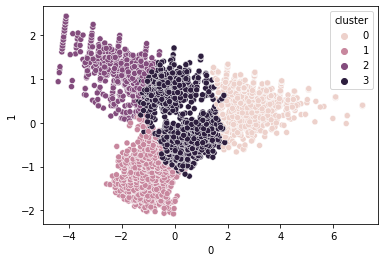

In [22]:
axs = plt.subplots()
axs = sns.scatterplot(0,1, hue='cluster', data= pca_x)

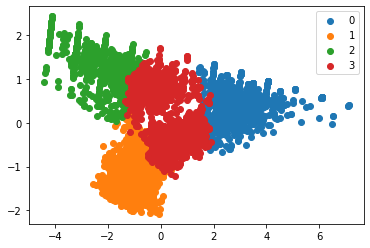

In [23]:
for i in sorted(pca_x['cluster'].unique()):
    #해당하는 클러스터 번호일 때 그림을 그리고, for 문을 실행하면서 그려진 그림 위에 덧그림
    tmp = pca_x.loc[pca_x['cluster']==i]
    plt.scatter(tmp[0],tmp[1])
    plt.legend(sorted(pca_x['cluster'].unique()))
    

#### 클러스터가 잘 나눠져있으니 pca가 정보를 잘 보존해 깔끔하게 데이터 차원을 축소 해준 것을 알 수 있음
-> 차원축소가 잘 되지 않았을 경우(주성분 개수가 적절하지 않을 경우)

### 클러스터 별 회원 특징 파악 - 탈퇴, 정기이용 여부

In [28]:
cc_join = pd.concat([cc, c], axis=1)
cc_join.keys()

Index(['월 평균', '월 중간 값', '최대 이용 횟수', '최소 이용 횟수', '회원 기간', 'cluster',
       'customer_id', 'name', 'class', 'gender', 'start_date', 'end_date',
       'campaign_id', 'is_deleted', 'class_name', 'price', 'campaign_name',
       'mean', 'median', 'amax', 'amin', 'flag1', 'cal_date', 'mem_period'],
      dtype='object')

In [31]:
# 탈퇴한 회원들의 groupby
newdf = cc_join.groupby(['cluster','is_deleted'], as_index=False).count()[['cluster','is_deleted','customer_id']]
newdf


cluster  is_deleted  customer_id
0        0           0          827
1        0           1           19
2        1           0         1230
3        1           1           21
4        2           1          759
5        3           0          785
6        3           1          551

In [32]:
len(cc_join[cc_join['cluster']==2])

759

In [34]:
#클러스터 및 탈퇴여부별 고객 비율 뽑기
d0 = (newdf['is_deleted']==0) # 스포츠 센터를 지속적으로 사용하고 있는회원
d1 = (newdf['is_deleted']==1) # 탈퇴 회원

In [37]:
for i in range(0,4):
    tmp = (newdf['cluster']==i)
    print('cluster'+str(i)+'의 탈퇴회원 비율은'+ str(round((newdf.loc[(tmp&d1),'customer_id'].sum()/newdf.loc[tmp,'customer_id'].sum())*100,2 ))+'%')
    
    print('cluster'+str(i)+'유지회원 비율은' + str(round((newdf.loc[(tmp&d0),'customer_id'].sum()/newdf.loc[tmp,'customer_id'].sum())*100,2))+'%')

cluster0의 탈퇴회원 비율은2.25%
cluster0유지회원 비율은97.75%
cluster1의 탈퇴회원 비율은1.68%
cluster1유지회원 비율은98.32%
cluster2의 탈퇴회원 비율은100.0%
cluster2유지회원 비율은0.0%
cluster3의 탈퇴회원 비율은41.24%
cluster3유지회원 비율은58.76%


- 클러스터 0,1 : 유지회원 > 탈퇴회원
- 클러스터 2 : 모두 탈퇴
- 클러스터 3 : 유지회원, 탈퇴회원 비율이 비슷

- 그룹 0: 평균기간이 7일로 가장 짧고 , 월 평균 횟수 8회로 제일 높음
- 그룹 1,3: 평균 회원 기간이 다른 그룹보다 긺, 그룹1은 그룹3보다 회원유지기간은 길지만, 월 평균 이용횟수는 적음
- 그룹2 : 평균회원유지 기간이 다른 그룹보다 짧음, 평균 이용횟수도 3회로 가장 낮음

->분석을 통해 그룹별 특징을 정의해서 프로모션할 때 사용 가능... 할.. 수도?

- 클러스터 0은 평균 회원기간이 가장 짧고, 월 평균 이용 횟수가 가장 높았음.
- 클러스터 2는 평균 회원기간도 짧고 월 평균 이용 횟수도 적음
- 클러스터 1,3 의 평균 회원 유지 기간이 클러스터 0,2 보다는 길었다.
- 클러스터 1은 3보다 회원 유지 기간이 길지만, 이용 횟수는 적은 편

#### <정리>

- 클러스터 0 : 초반에 열심히 이용한 그룹 (이용 횟수 많고, 유지 회원 많음, 평균 회원기간 짧음)
- 클러스터 1 : 안정적으로 이용중인 그룹 (회원 유지 기간이 길고, 이용횟수는 적음, 유지 회원 수는 많음)
- 클러스터 2 : 탈퇴자 그룹(100% 탈퇴한 그룹, 가장 짧게 이용한 그룹)
- 클러스터 3 : 회원 유지 기간이 길고, 탈퇴 회원과 지속 회원이 비슷한 그룹

### 정기 이용 여부 확인

In [39]:
newdf2 = cc_join.groupby(['cluster','flag1'], as_index=False).count()[['cluster','flag1','customer_id']]
newdf2

cluster  flag1  customer_id
0        0      0           52
1        0      1          794
2        1      0            2
3        1      1         1249
4        2      0          496
5        2      1          263
6        3      0          229
7        3      1         1107

In [40]:
flag0 = (newdf2['flag1']==0) # 정기적으로 사용하지 않는 회원
flag1 = (newdf2['flag1']==1) # 정기회원

In [41]:
for i in range(0,4):
    tmp = (newdf2['cluster']==i)
    print('cluster'+str(i)+'정기회원 비율은'+ str(round((newdf2.loc[(tmp&flag1),'customer_id'].sum()/newdf2.loc[tmp,'customer_id'].sum())*100 ,2))+'%')
    
    print('cluster'+str(i)+'비정기회원 비율은' + str(round((newdf2.loc[(tmp&flag0),'customer_id'].sum()/newdf2.loc[tmp,'customer_id'].sum())*100 ,2))+'%')

cluster0정기회원 비율은93.85%
cluster0비정기회원 비율은6.15%
cluster1정기회원 비율은99.84%
cluster1비정기회원 비율은0.16%
cluster2정기회원 비율은34.65%
cluster2비정기회원 비율은65.35%
cluster3정기회원 비율은82.86%
cluster3비정기회원 비율은17.14%


- 클러스터 0 : 초반에 불타는 그룹 (정기 94%, 비정기 6%)
- 클러스터 1 : 안정적인 그룹 (정기 99%, 비정기 0.16%)
- 클러스터 2 : 가장 이용이 적은 그룹 (정기 34%, 비정기 66%)
- 클러스터 3 : 유지, 탈퇴 비율이 비슷한 그룹 (정기 83%, 비정기 17%)